Introducción a tensorflow con redes neuronales

In [2]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from tensorflow.keras import layers, models

2025-03-19 03:41:20.862804: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-19 03:41:20.866556: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-19 03:41:20.875834: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742355680.890518   15361 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742355680.895041   15361 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742355680.908456   15361 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [3]:
sklearn.__version__

'1.0.2'

In [6]:
# 1. Cargar el conjunto de datos
# Usaremos el dataset 'California Housing' de sklearn
california = fetch_california_housing()

In [7]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [8]:
# Convertir el dataset a un DataFrame de Pandas
df = pd.DataFrame(california.data, columns=california.feature_names)
df['PRICE'] = california.target
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'PRICE'],
      dtype='object')

In [9]:
# 2. Visualizar los datos
print("Primeras filas del conjunto de datos:")
print(df.head())

Primeras filas del conjunto de datos:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


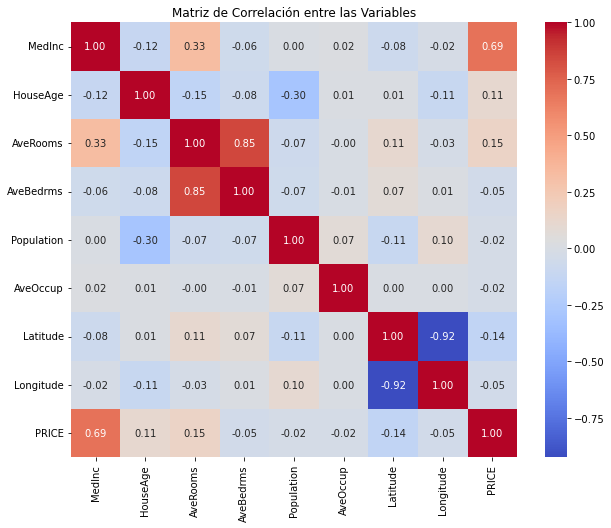

In [10]:
# 3. Matriz de Correlación
corr_matrix = df.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación entre las Variables')
plt.show()

In [11]:
# Verificar valores nulos
print("\nValores nulos en el dataset:")
print(df.isnull().sum())


Valores nulos en el dataset:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64


In [12]:
# Preprocesamiento de los datos
# Eliminar filas con valores nulos (si las hubiera)
df = df.dropna()

In [13]:
# Dividir el conjunto de datos en características (X) y la variable objetivo (y)
X = df.drop('PRICE', axis=1)
y = df['PRICE']

In [14]:
# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# modelo simple
model_linear = models.Sequential()
model_linear.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_linear.add(layers.Dense(64, activation='relu'))
model_linear.add(layers.Dense(1, activation='linear'))  # Capa de salida con activación lineal

/home/codespace/anaconda3/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-19 03:42:03.273625: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [16]:
# Compilar el modelo
## Se utiliza un optimizador adam con un loss function mse y una metrica de evaluación mae
model_linear.compile(optimizer='adam', loss='mse', metrics=['mae'])
# Entrenar el modelo
history_linear = model_linear.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1186.7952 - mae: 13.1966 - val_loss: 1.6598 - val_mae: 1.0361
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4.4661 - mae: 1.4855 - val_loss: 12.9768 - val_mae: 2.2632
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6.6028 - mae: 1.5857 - val_loss: 2.1266 - val_mae: 1.0582
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.2579 - mae: 1.2671 - val_loss: 88.7136 - val_mae: 7.3662
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 11.7672 - mae: 2.0458 - val_loss: 312.8346 - val_mae: 13.3411
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 33.0880 - mae: 3.0438 - val_loss: 25.3421 - val_mae: 3.5062
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 25.5158 - mae: 3.0292 - val_loss: 2.3493 - val_mae: 1.2292
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 76.8372 - mae: 3.2973 - val_loss: 6.9323 - val_mae: 1.9112
Epoch 9/100
413/413 ━━━━━━━━━━━━━━

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.1118 - mae: 0.9310 - val_loss: 0.7441 - val_mae: 0.6299
Epoch 55/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.2991 - mae: 0.8052 - val_loss: 0.6043 - val_mae: 0.5820
Epoch 56/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.3052 - mae: 0.8943 - val_loss: 0.6770 - val_mae: 0.5846
Epoch 57/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.5419 - mae: 0.8331 - val_loss: 0.6730 - val_mae: 0.6567
Epoch 58/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.8631 - mae: 0.6684 - val_loss: 0.6856 - val_mae: 0.5881
Epoch 59/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.8188 - mae: 0.6751 - val_loss: 0.6071 - val_mae: 0.5793
Epoch 60/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7487 - mae: 0.6465 - val_loss: 2.4414 - val_mae: 1.0956
Epoch 61/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.0889 - mae: 0.7345 - val_loss: 0.6018 - val_mae: 0.5655
Epoch 62/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

In [17]:
# Evaluar el modelo
train_mae_linear = model_linear.evaluate(X_train, y_train)[1]
test_mae_linear = model_linear.evaluate(X_test, y_test)[1]
print(f'\nMean Absolute Error (Modelo Lineal con Capas) - Entrenamiento: {train_mae_linear:.2f}')
print(f'Mean Absolute Error (Modelo Lineal con Capas) - Prueba: {test_mae_linear:.2f}')

516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - loss: 0.4851 - mae: 0.5357
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - loss: 0.5088 - mae: 0.5477

Mean Absolute Error (Modelo Lineal con Capas) - Entrenamiento: 0.54
Mean Absolute Error (Modelo Lineal con Capas) - Prueba: 0.55


In [18]:
# Predecir valores
y_train_pred_linear = model_linear.predict(X_train)
y_test_pred_linear = model_linear.predict(X_test)

516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step


In [19]:
# Red Neuronal Completa (Modelo Complejo)
model_nn = models.Sequential()
model_nn.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_nn.add(layers.Dropout(0.2))  # Añadir Dropout del 20%
model_nn.add(layers.Dense(64, activation='relu'))
model_nn.add(layers.Dense(1, activation='linear'))  # Capa de salida con activación lineal

In [20]:
# Compilar el modelo
model_nn.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenar el modelo
history_nn = model_nn.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10806.3535 - mae: 51.3557 - val_loss: 24.0533 - val_mae: 3.0533
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 230.8665 - mae: 9.2563 - val_loss: 15.0840 - val_mae: 3.1224
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 121.0605 - mae: 6.6311 - val_loss: 13.0446 - val_mae: 2.8783
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 61.9778 - mae: 4.7329 - val_loss: 10.5663 - val_mae: 2.6544
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 42.1769 - mae: 3.9922 - val_loss: 9.5138 - val_mae: 2.3567
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 83.1542 - mae: 4.7911 - val_loss: 1.5733 - val_mae: 0.9369
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 19.7234 - mae: 2.7227 - val_loss: 1.5170 - val_mae: 0.9079
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 32.1871 - mae: 3.4239 - val_loss: 53.6245 - val_mae: 5.4634
Epoch 9/100
413/413 ━━━━━━━━━

413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5896 - mae: 0.5773 - val_loss: 0.5420 - val_mae: 0.5442
Epoch 55/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5933 - mae: 0.5751 - val_loss: 0.5679 - val_mae: 0.5536
Epoch 56/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5756 - mae: 0.5683 - val_loss: 0.5814 - val_mae: 0.5547
Epoch 57/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5440 - mae: 0.5566 - val_loss: 0.5963 - val_mae: 0.5591
Epoch 58/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5500 - mae: 0.5547 - val_loss: 0.5597 - val_mae: 0.5518
Epoch 59/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6057 - mae: 0.5736 - val_loss: 0.5518 - val_mae: 0.5410
Epoch 60/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5605 - mae: 0.5602 - val_loss: 0.5416 - val_mae: 0.5568
Epoch 61/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5629 - mae: 0.5660 - val_loss: 0.5543 - val_mae: 0.5565
Epoch 62/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

In [21]:
# Evaluar el modelo
train_mae_nn = model_nn.evaluate(X_train, y_train)[1]
test_mae_nn = model_nn.evaluate(X_test, y_test)[1]
print(f'\nMean Absolute Error (Red Neuronal Completa) - Entrenamiento: {train_mae_nn:.2f}')
print(f'Mean Absolute Error (Red Neuronal Completa) - Prueba: {test_mae_nn:.2f}')

516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4813 - mae: 0.5126
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - loss: 0.4950 - mae: 0.5207

Mean Absolute Error (Red Neuronal Completa) - Entrenamiento: 0.52
Mean Absolute Error (Red Neuronal Completa) - Prueba: 0.53


In [22]:
# Predecir valores
y_train_pred_nn = model_nn.predict(X_train)
y_test_pred_nn = model_nn.predict(X_test)

516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step


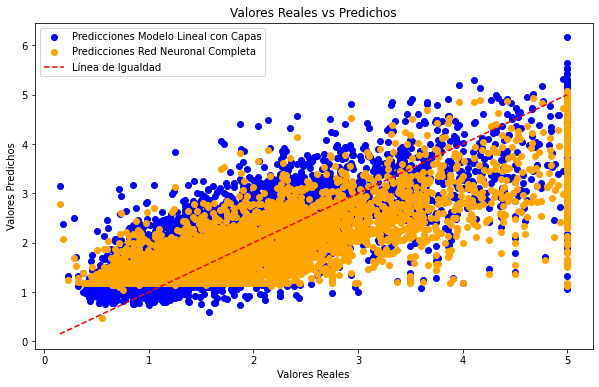

In [23]:
# Graficar Actual vs Predicho para ambos modelos en el conjunto de prueba
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_linear, color='blue', label='Predicciones Modelo Lineal con Capas')
plt.scatter(y_test, y_test_pred_nn, color='orange', label='Predicciones Red Neuronal Completa')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Línea de Igualdad')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs Predichos')
plt.legend()
plt.show()